In [1]:
import requests

In [14]:
text = "заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать файл технического задания, система выдает сообщение о недоступности сервера, хотя другие разделы платформы работают корректно, коллеги из соседнего отдела тоже сталкиваются с этой проблемой, мы пробовали использовать разные браузеры и устройства, но результат одинаковый, техническая поддержка не отвечает на запросы уже второй день, а сроки подачи заявки истекают через три дня, подскажите, пожалуйста, как можно решить эту проблему или есть ли альтернативный способ получить необходимую документацию для участия в тендере, ситуация критическая и требует срочного вмешательства"
info = []
for i in range(1, len(text.split(" "))+1):
    info.append(' '.join(text.split(" ")[:i]))
info


['заказчик',
 'заказчик не',
 'заказчик не может',
 'заказчик не может найти',
 'заказчик не может найти нужный',
 'заказчик не может найти нужный документ',
 'заказчик не может найти нужный документ на',
 'заказчик не может найти нужный документ на странице',
 'заказчик не может найти нужный документ на странице тендеров,',
 'заказчик не может найти нужный документ на странице тендеров, возникает',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать файл',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать файл технического',


In [15]:
graph = []
for rsp in info:
    response = requests.get("http://localhost:7777/query?query="+rsp)
    graph.append([len(rsp.split(' ')), response.json()["execution_time"]])
print(graph)


[[1, 0.30225515365600586], [2, 0.2699100971221924], [3, 0.2838139533996582], [4, 0.2796509265899658], [5, 0.2931840419769287], [6, 0.30158185958862305], [7, 0.3097798824310303], [8, 0.316054105758667], [9, 0.4184887409210205], [10, 0.4877278804779053], [11, 0.6819126605987549], [12, 0.6650769710540771], [13, 0.6999759674072266], [14, 0.6489059925079346], [15, 0.6714093685150146], [16, 0.6432211399078369], [17, 0.6584930419921875], [18, 0.7197868824005127], [19, 0.6833364963531494], [20, 0.7160310745239258], [21, 0.7268600463867188], [22, 0.8261144161224365], [23, 1.05076265335083], [24, 1.0761022567749023], [25, 0.9291343688964844], [26, 0.9344379901885986], [27, 0.9392356872558594], [28, 0.9766702651977539], [29, 0.9899439811706543], [30, 1.0577528476715088], [31, 1.0384089946746826], [32, 1.1917831897735596], [33, 1.2510874271392822], [34, 1.3359270095825195], [35, 1.4217426776885986], [36, 1.371830701828003], [37, 1.4115042686462402], [38, 1.551879644393921], [39, 1.5335500240325928

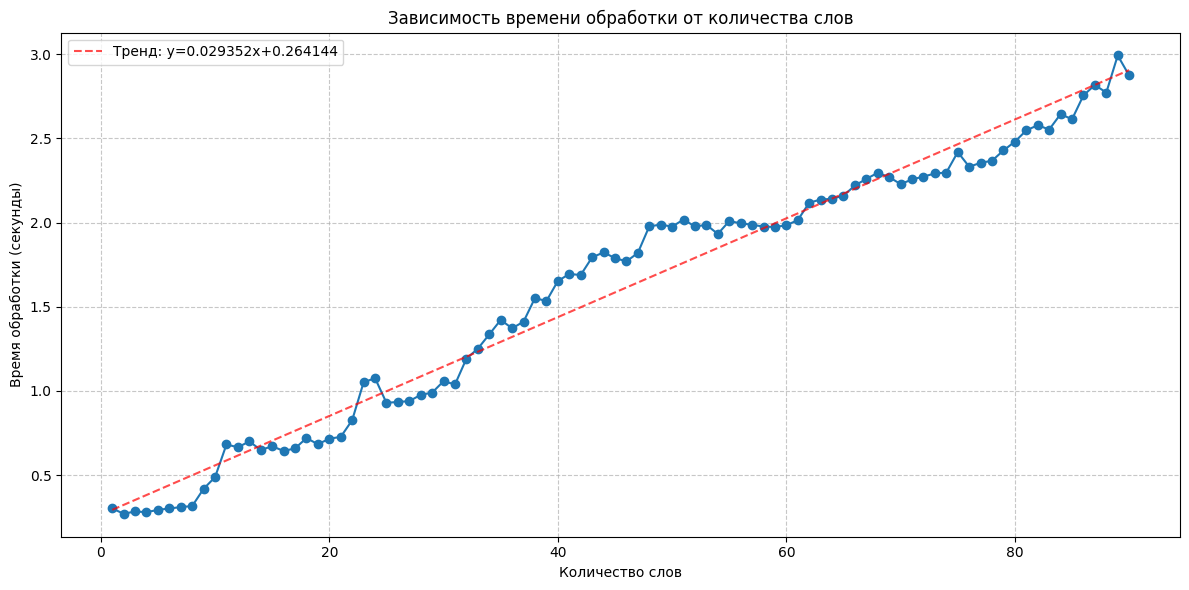

Минимальное время обработки: 0.2699 сек
Максимальное время обработки: 2.9927 сек


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Извлекаем данные из graph
words_count = [item[0] for item in graph]
execution_time = [item[1] for item in graph]

# Создаем график
plt.figure(figsize=(12, 6))
plt.plot(words_count, execution_time, marker='o', linestyle='-', color='#1f77b4')
plt.title('Зависимость времени обработки от количества слов')
plt.xlabel('Количество слов')
plt.ylabel('Время обработки (секунды)')
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем линию тренда
z = np.polyfit(words_count, execution_time, 1)
p = np.poly1d(z)
plt.plot(words_count, p(words_count), "r--", alpha=0.7, 
         label=f"Тренд: y={z[0]:.6f}x+{z[1]:.6f}")

plt.legend()                                                 
plt.tight_layout()
plt.show()

# Выводим статистику
print(f"Минимальное время обработки: {min(execution_time):.4f} сек")
print(f"Максимальное время обработки: {max(execution_time):.4f} сек")
print(f"Среднее время обработки: {np.mean(execution_time):.4f} сек")


Результаты сопоставления слов с опечатками (показаны первые 20 из 200):
Слово с опечаткой: aпотасвщики, Найденное совпадение: поставщик
Слово с опечаткой: преyложений, Найденное совпадение: предложение
Слово с опечаткой: вокумжнтом, Найденное совпадение: документ
Слово с опечаткой: qаукциноаэи, Найденное совпадение: аукцион
Слово с опечаткой: аукционc, Найденное совпадение: аукцион
Слово с опечаткой: оаптм, Найденное совпадение: Нет совпадений
Слово с опечаткой: ошхибакх, Найденное совпадение: ошибка
Слово с опечаткой: оиплааим, Найденное совпадение: оплата
Слово с опечаткой: закаёзчикахt, Найденное совпадение: заказчик
Слово с опечаткой: mслугу, Найденное совпадение: услуга
Слово с опечаткой: зrявйо, Найденное совпадение: Нет совпадений
Слово с опечаткой: теынедры, Найденное совпадение: тендер
Слово с опечаткой: bсистемаiyи, Найденное совпадение: система
Слово с опечаткой: тенделами, Найденное совпадение: тендер
Слово с опечаткой: учаxтникй, Найденное совпадение: участник
Слово с опеч

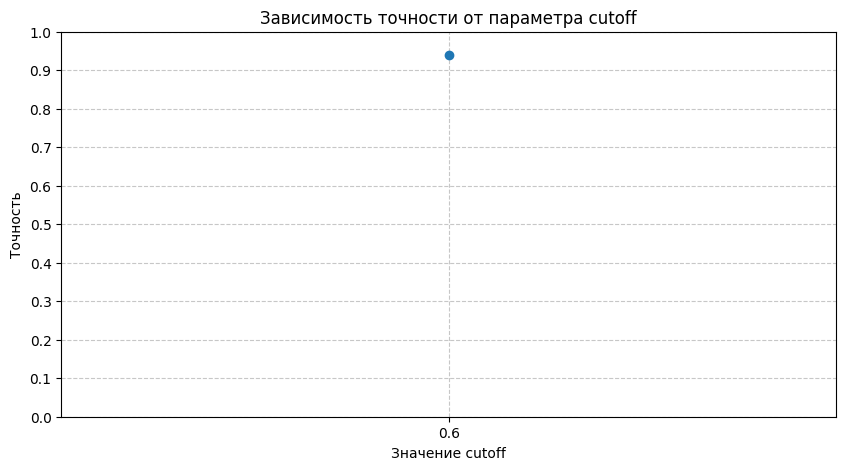

In [27]:
from difflib import get_close_matches
import random
import matplotlib.pyplot as plt
import pymorphy2
import string

# Инициализируем морфологический анализатор для создания разных форм слов
morph = pymorphy2.MorphAnalyzer()

# Базовые слова для тестирования
original_words = ["заказчик", "документ", "тендер", "ошибка", "система", "поддержка", "платформа", 
                 "контракт", "поставщик", "услуга", "товар", "закупка", "аукцион", "предложение", 
                 "оплата", "договор", "исполнитель", "заявка", "участник", "процедура"]

# Функция для генерации разных форм слова
def generate_word_forms(word):
    parsed_word = morph.parse(word)[0]
    forms = []
    
    # Генерируем разные падежи
    for case in ['nomn', 'gent', 'datv', 'accs', 'ablt', 'loct']:
        for number in ['sing', 'plur']:
            try:
                form = parsed_word.inflect({case, number})
                if form:
                    forms.append(form.word)
            except:
                pass
    
    return forms

# Функция для внесения опечаток в слово
def introduce_typos(word, num_typos=1):
    result = list(word)
    word_len = len(word)
    
    if word_len <= 1:
        return word
    
    for _ in range(min(num_typos, word_len - 1)):
        typo_type = random.choice(['replace', 'insert', 'delete', 'swap'])
        
        if typo_type == 'replace' and word_len > 0:
            pos = random.randint(0, word_len - 1)
            result[pos] = random.choice(string.ascii_lowercase + 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя')
        
        elif typo_type == 'insert' and word_len > 0:
            pos = random.randint(0, word_len)
            result.insert(pos, random.choice(string.ascii_lowercase + 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'))
            word_len += 1
        
        elif typo_type == 'delete' and word_len > 1:
            pos = random.randint(0, word_len - 1)
            result.pop(pos)
            word_len -= 1
        
        elif typo_type == 'swap' and word_len > 1:
            pos = random.randint(0, word_len - 2)
            result[pos], result[pos + 1] = result[pos + 1], result[pos]
    
    return ''.join(result)

# Создаем расширенный набор слов с разными формами
expanded_original_words = []
for word in original_words:
    expanded_original_words.append(word)
    expanded_original_words.extend(generate_word_forms(word))

# Удаляем дубликаты
expanded_original_words = list(set(expanded_original_words))

# Создаем тестовые данные с опечатками - генерируем ровно 200 слов
misspelled_words = []
correct_mappings = {}  # Словарь для хранения правильных соответствий

# Генерируем ровно 200 слов с опечатками
for _ in range(200):
    # Выбираем случайное слово из расширенного набора
    original_word = random.choice(expanded_original_words)
    
    # Определяем базовую форму для проверки
    base_form = morph.parse(original_word)[0].normal_form
    
    # Вносим от 1 до 3 опечаток
    num_typos = random.randint(1, 3)
    misspelled = introduce_typos(original_word, num_typos)
    
    misspelled_words.append(misspelled)
    correct_mappings[misspelled] = base_form

# Проверяем точность get_close_matches на всех 200 словах
correct_matches = 0
total_tests = len(misspelled_words)
results_dict = {}

for test_word in misspelled_words:
    matches = get_close_matches(test_word, original_words, n=1, cutoff=0.6)
    
    # Сохраняем результат для вывода
    results_dict[test_word] = matches[0] if matches else "Нет совпадений"
    
    # Проверяем, является ли найденное совпадение правильным
    if matches and matches[0] in correct_mappings.get(test_word, ""):
        correct_matches += 1

# Вычисляем точность
accuracy = correct_matches / total_tests if total_tests > 0 else 0

# Выводим результаты (ограничиваем вывод первыми 20 примерами для наглядности)
print(f"Результаты сопоставления слов с опечатками (показаны первые 20 из {total_tests}):")
for i, (word, match) in enumerate(list(results_dict.items())[:20]):
    print(f"Слово с опечаткой: {word}, Найденное совпадение: {match}")

print(f"\nВсего тестов: {total_tests}")
print(f"Правильных совпадений: {correct_matches}")
print(f"Точность функции get_close_matches при cutoff=0.6: {accuracy:.2%}")

cutoff_values = [0.6]
cutoff_results = []

for cutoff in cutoff_values:
    correct_matches = 0
    
    for test_word in misspelled_words:
        matches = get_close_matches(test_word, original_words, n=1, cutoff=cutoff)
        
        if matches and matches[0] in correct_mappings.get(test_word, ""):
            correct_matches += 1
    
    accuracy = correct_matches / total_tests if total_tests > 0 else 0
    cutoff_results.append((cutoff, accuracy))
    print(f"Точность при cutoff={cutoff}: {accuracy:.2%}")

# Визуализируем результаты для разных значений cutoff
plt.figure(figsize=(10, 5))
plt.plot([r[0] for r in cutoff_results], [r[1] for r in cutoff_results], marker='o', linestyle='-')
plt.title('Зависимость точности от параметра cutoff')
plt.xlabel('Значение cutoff')
plt.ylabel('Точность')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(cutoff_values)
plt.yticks([i/10 for i in range(11)])
plt.show()


Точность при пороге расстояния Левенштейна = 4: 90.50%


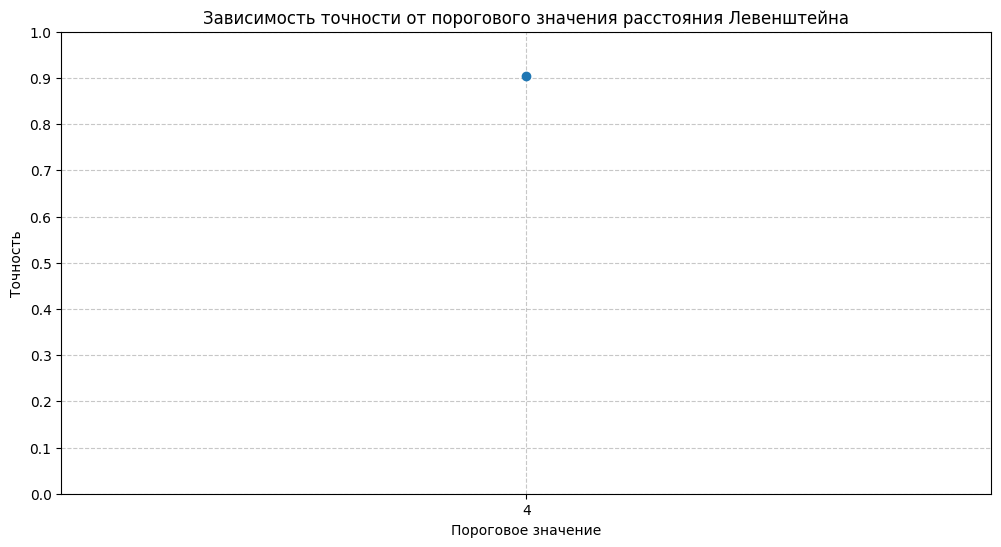

In [28]:
# Реализуем расстояние Левенштейна
def levenshtein_distance(s1, s2):
    """
    Вычисляет расстояние Левенштейна между двумя строками
    """
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    
    if len(s2) == 0:
        return len(s1)
    
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

# Функция для поиска ближайшего слова по расстоянию Левенштейна
def find_closest_word(word, word_list, max_distance=None):
    """
    Находит ближайшее слово из списка по расстоянию Левенштейна
    """
    min_distance = float('inf')
    closest_word = None
    
    for candidate in word_list:
        distance = levenshtein_distance(word, candidate)
        if distance < min_distance:
            min_distance = distance
            closest_word = candidate
            
        # Если нашли точное совпадение, можно сразу вернуть
        if distance == 0:
            return candidate, 0
    
    # Если задано максимальное расстояние и минимальное расстояние больше него
    if max_distance is not None and min_distance > max_distance:
        return None, min_distance
        
    return closest_word, min_distance

threshold_values = [4]
threshold_results = []

for threshold in threshold_values:
    correct_matches = 0
    
    for test_word in misspelled_words:
        closest_word, distance = find_closest_word(test_word, original_words)
        
        # Проверяем, находится ли расстояние в пределах порога
        if distance <= threshold and closest_word in correct_mappings.get(test_word, ""):
            correct_matches += 1
    
    accuracy = correct_matches / total_tests if total_tests > 0 else 0
    threshold_results.append((threshold, accuracy))
    print(f"Точность при пороге расстояния Левенштейна = {threshold}: {accuracy:.2%}")

# Визуализируем результаты для разных пороговых значений
plt.figure(figsize=(12, 6))
plt.plot([r[0] for r in threshold_results], [r[1] for r in threshold_results], marker='o', linestyle='-')
plt.title('Зависимость точности от порогового значения расстояния Левенштейна')
plt.xlabel('Пороговое значение')
plt.ylabel('Точность')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(threshold_values)
plt.yticks([i/10 for i in range(11)])
plt.show()